Name - Ishita Sharma
CWID - 50224923

I am starting my data analysis project 
Firstly by loading the data using the two ways that are as follows 
1) Using the pandas dataframe and 
2) Using the sklearn 
I am reading the data stored in the filename named Breast_cancer_data.csv

In [2]:
#Loading all the libraries required all together
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score, validation_curve
import numpy as np





DATA LOADING & DATA EXPLORATION
(EXPLORARTORY DATA ANALYSIS EDA)
(Using the pd dataframe and also straight from the sklearn)
Using the pd data I am planning to do some data explorations and then data cleaning)
Generally the breast cancer data read directly from sklearn is mostly clean,so that is why I did not use that data)


In [3]:
#loading the data
df = pd.read_csv("Breast_cancer_data.csv",header = 0)
print(df)

#here as we had the NAN value columns(since the null values are not required in the data) 
#dropping that column of the data
df = df.dropna(axis = 1)

#printing the first six columns of the data
print(df.head())
print()
print()
print(df.tail()) #here exploring the last six columns of the data 

#prints the name of all the columns in the data(makes easy for better understand the data)
print(df.columns)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M     

In [4]:
#Converting diagonisis data column into 0 and 1 for convienence
df = df.replace({'B':0,'M':1})


In [19]:
#This is the direct loading of the data from the sklearn library itself
from sklearn.datasets import load_breast_cancer
df1 = load_breast_cancer()
#giving all the information about the data
print(df1.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [20]:
#In the data obtained from sklearn we already have data divided in the feature and target values
print(df1.feature_names)
print()
print(df1.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

['malignant' 'benign']


In [21]:
print(df1.data)
print()
print("The shape of the data is {}".format(df1.data.shape))


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

The shape of the data is (569, 30)


In [22]:
#spitiing the independent and dependent variables
#X = df.iloc[:,2:]
#Y = df.iloc[:,1]
#X.head() , Y.head()




In [23]:
#getting the shape of the data
df.shape

(569, 32)

In [24]:
#getting the length of the data
len(df)

569

In [25]:
#Exploring the data by using the .describe() so as to study the mean and median of the data(maininly for the ouliers)
df.describe()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


For the outliers we check the mean 
Therefore in the mean and median for example for perimeter_mean we can see that the mean is more than the median which is pure indicator of the outlier.
(Here goes the norrmal rules for checking the outlier is that if the mean is greater than median therfore this indicates the outliers)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In the above cell we can observe that the datatypes of all the features(independent varriables) are float and int data type.
Intially there was one object data type column as well,which I converted to int data type
So therefore the above info data is in float and int data type

In [27]:
#just explorring the unique columns in tha dataframe
x = df['diagnosis'].unique()
x

array([1, 0])

In [28]:
df['diagnosis'].value_counts().head()

0    357
1    212
Name: diagnosis, dtype: int64

Number of Benign:  357
Number of Malignant :  212


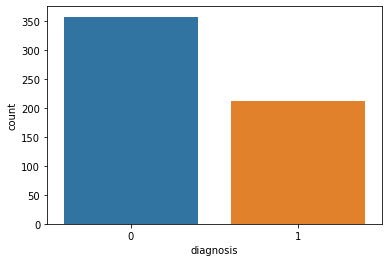

In [29]:
#visually exploring the data plot of the predictor(diagnosis) 
Target_plot = sns.countplot(df['diagnosis'],label="Count")     
B, M = df['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [30]:
#help(sns.heatmap)

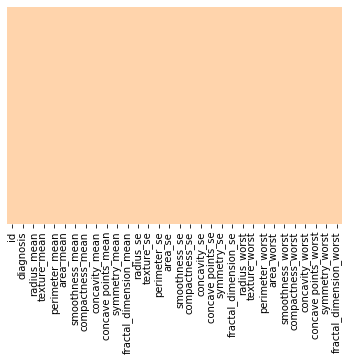

In [31]:
#visually explorring if any NA value columns are there or not

sns.heatmap(df.isnull(),cbar=False,yticklabels=False, cmap = "icefire_r")

The above is an attempt to try to find visually find if there is any missing value but since there is one color all over the graph. This fairly indicates no missing value in the dataset(df)

In [32]:
#correlation 
df_corr = df.corr() #correlation between all the features and targets with each other
print(df_corr)
x_corr = x.corr() #here only applying to the independent features
print(x_corr)

                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

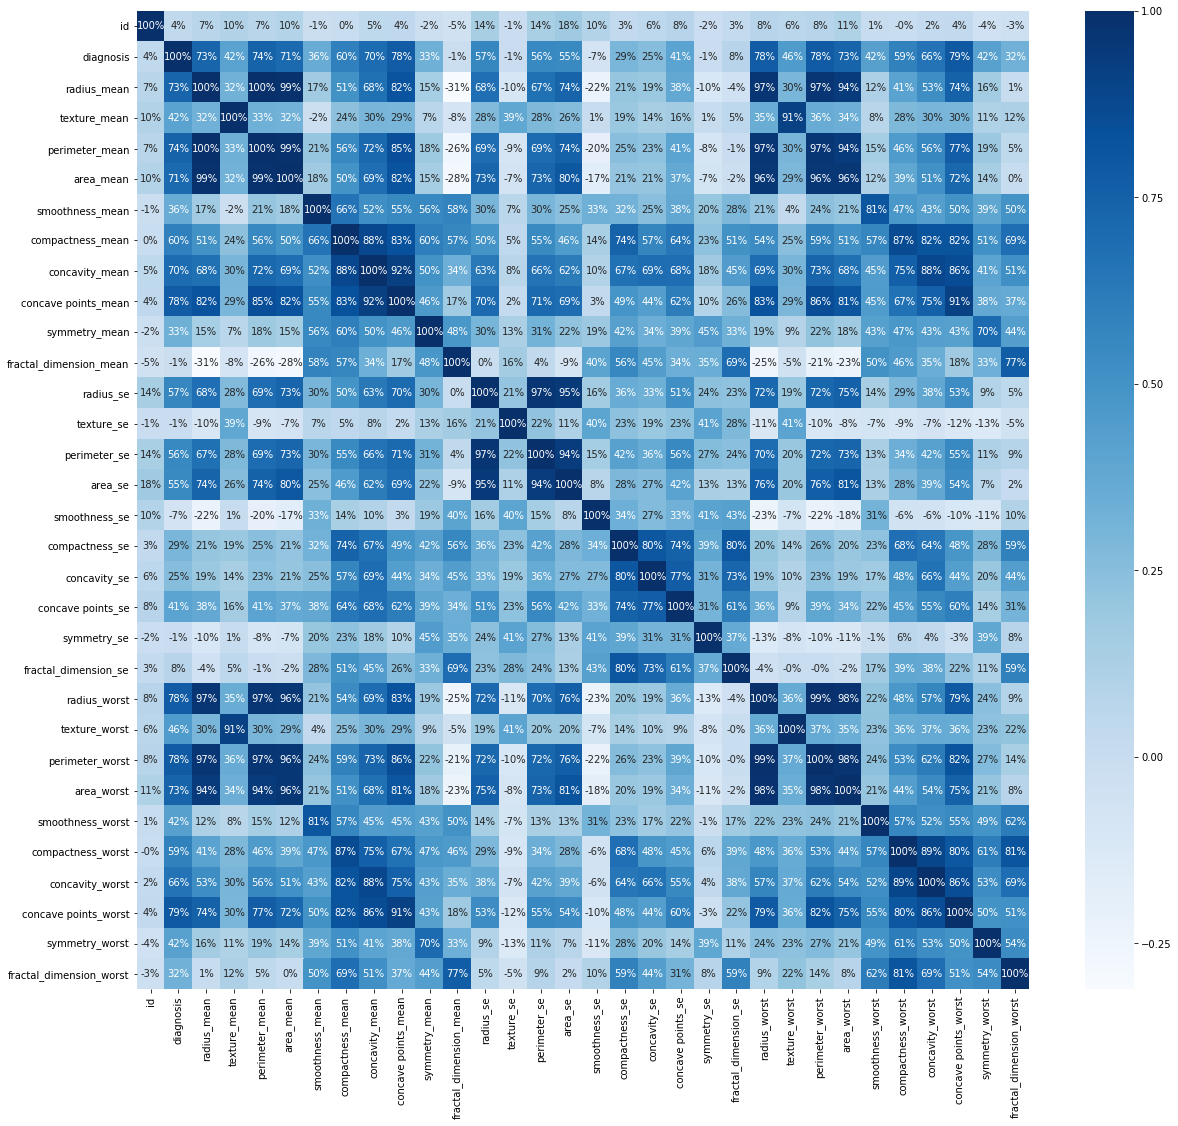

In [33]:
#visually observing the correlation between the features
plt.figure(figsize=(20,18))
sns.heatmap(df_corr,cmap = 'Blues',annot=True,fmt = '.0%') 


The above is the correlation between the each of the features along the diagonal are 100%
If we can observe for example radius_worst and perimeter_worst are 99% correlated 
Similarily the radius_mean and perimeter_worst are 97% correlated


<Figure size 720x720 with 0 Axes>

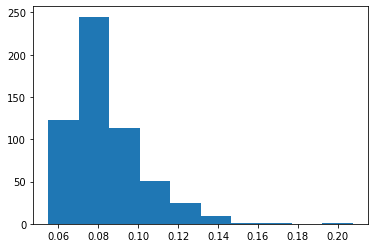

<Figure size 720x720 with 0 Axes>

In [34]:
#Outlier graph
outlier_graph = np.array(df.iloc[:,31])
graph = plt.hist(outlier_graph)
plt.figure(figsize = (10,10))


In [35]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [36]:
#taking out the mean for each of the category
df.groupby(df['diagnosis']).mean()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [37]:
select_datacol = df.select_dtypes(include=['int'])

In [38]:
print(select_datacol.columns)

Index(['id', 'diagnosis'], dtype='object')


In [39]:
#trying to represent the categorical variable in quantitative variable for ml 
dummy = pd.get_dummies(df['diagnosis'], columns= df['diagnosis'],prefix='C')
print(dummy.columns)

Index(['C_0', 'C_1'], dtype='object')


In [49]:
#Normalization(Regularization)
x_mean = x.mean()
y_mean = y.mean()
x_std = x.std()
x_norm = (x-x_mean)/x_std
print(x_norm.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.096100     -2.071512        1.268817   0.983510         1.567087   
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.280628        2.650542             2.530249       2.215566   
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [50]:
#target sum
target_counts = sum(df["diagnosis"])
print(target_counts)

print(sum(df["diagnosis"]==1))
print(sum(df["diagnosis"]==0))

212
212
357


In [51]:
#incidence
ratio = target_counts/len(df)
ratio
#this shows that if we try to make the predictive model, we will find that the ratio is very less

0.37258347978910367

In [52]:
#seperated the target and dep features
y = df.diagnosis
print(y.shape)
list = ['id','diagnosis']
x = df.drop(list,axis = 1)

#changes

#Y = df.iloc[:, 1].values
#print(Y.shape)
#Y = Y.reshape(-1,1)
#print(Y.shape)
#X = df.iloc[:, 2:31].values
#print(X.shape)

#X = df.iloc[:, 2:31].values #Notice I started from index  2 to 31, essentially removing the id column & diagnosis
#Y = df.iloc[:, 1].values 


(569,)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

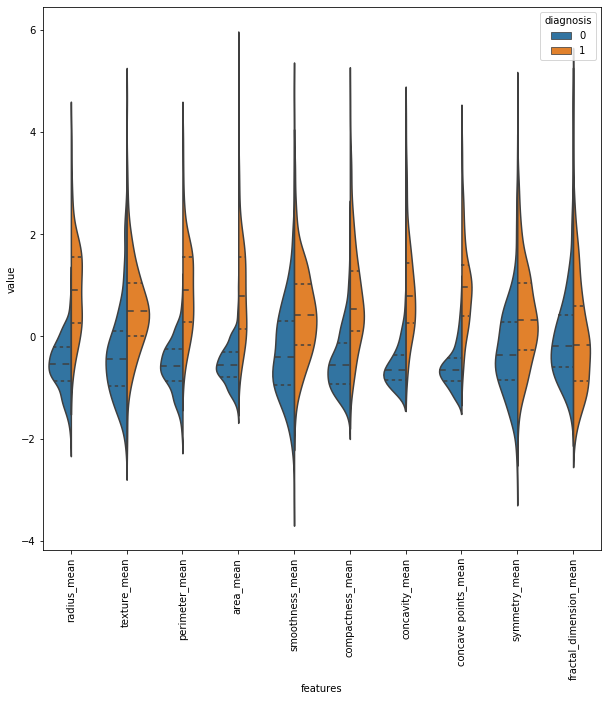

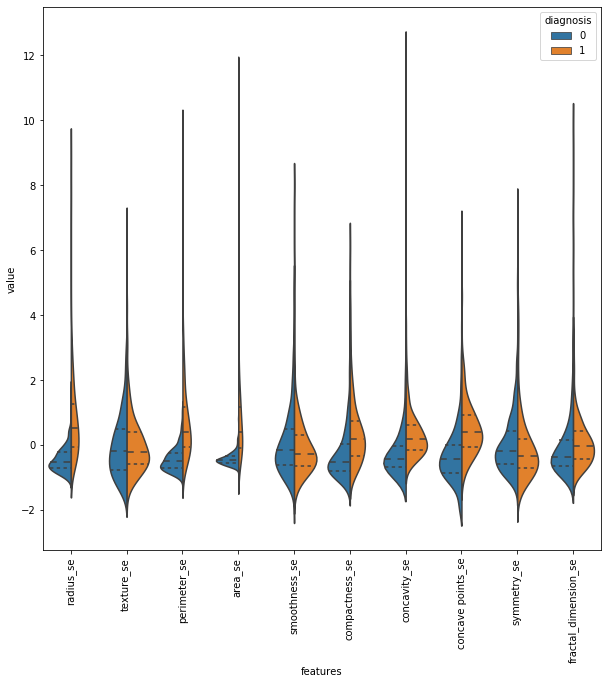

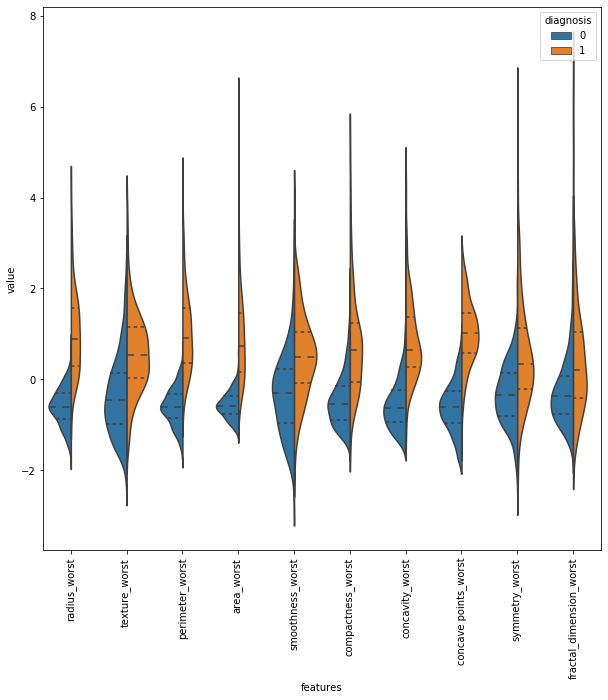

In [53]:
#the below is the voilin plot, I made the plot inorder to understand which feature can be useful for the classification of the M or B
#since the data value was large for features so I decided to first normalize the features and predictor and then here I am 
#showing the violin plot for first ten features and in a same we can do for rest of the features
df = pd.concat([y,x_norm.iloc[:,0:10]],axis=1)
df = pd.melt(df,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=df,split=True, inner="quart")
plt.xticks(rotation=90)

#####

df = pd.concat([y,x_norm.iloc[:,10:20]],axis=1)
df = pd.melt(df,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=df,split=True, inner="quart")
plt.xticks(rotation=90)

######

df = pd.concat([y,x_norm.iloc[:,20:31]],axis=1)
df = pd.melt(df,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=df,split=True, inner="quart")
plt.xticks(rotation=90)




The plot above suggests that
If we for example observe the median for the smoothness_mean, texture_mean. They can be consisdered as a good classification for B or M 
At the same page if we observe the fractal_dimension_mean 
We discover that it better not good option for the classification 
Hence we can even end up discarding it as well

Similarily we can figure for the rest ten features in the other plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

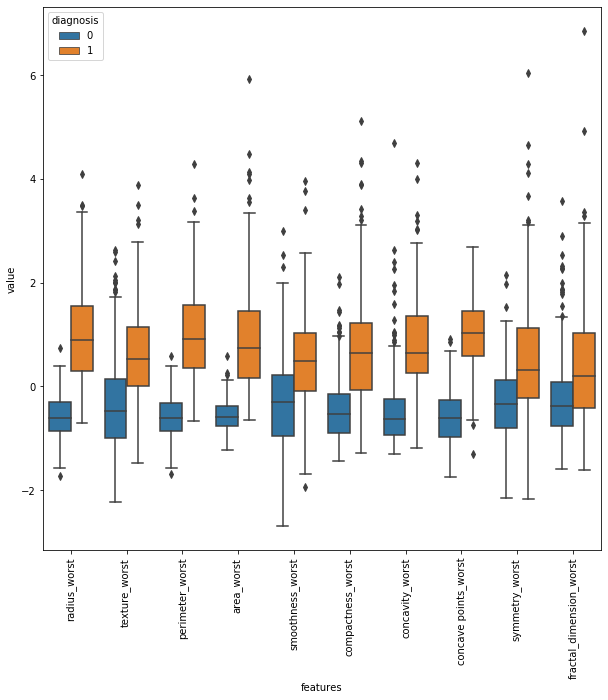

In [54]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df)
plt.xticks(rotation=90)

In [57]:
#building the linear model(using sklearn)
logreg = linear_model.LogisticRegression(solver = 'lbfgs')
kfold = KFold(n_splits=5,random_state=7)
cv_results = cross_val_score(logreg, x_norm, y, cv=kfold)
print (cv_results.mean()*100, "%")



97.7177456916628 %


Here I am usig cross validation score before that I am using the Logistic Regressor classification 
Normally cross validation is used to check the overfitting and accuracy of the model
Well this is just the start for the applying of the model 
Rest the application of the model is continued in the other notebook named applying_model    